## 이미지처리

In [2]:
!dir/w

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: CE6B-3D38

 C:\BSW 디렉터리

[.]                                .gitignore
[.ipynb_checkpoints]               [312]
[etc]                              iris.csv
KakaoTalk_20250714_150803239.jpg   myserver.bat
py01.ipynb                         py02.ipynb
py03.ipynb                         py04.ipynb
py05.ipynb                         py06.ipynb
py06_my.ipynb                      
              11개 파일           5,122,905 바이트
               4개 디렉터리  11,714,904,064 바이트 남음


평균밝기: 114.83
😜이미지가 너무 어둡습니다


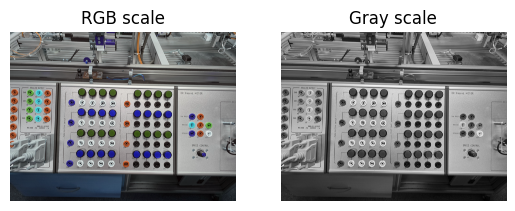

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # RGB -> BGR

# 1. numpy로 즉석 이미지 생성
img = cv2.imread('C:/BSW/KakaoTalk_20250714_151510015.jpg')
# 2. 그레이스케일 변환(색상->밝기)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 3. 이미지의 평균 밝기를 계산
mean_brighteness = np.mean(gray)
print(f"평균밝기: {mean_brighteness:.2f}")

if mean_brighteness < 127.5:
    print("😜이미지가 너무 어둡습니다")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255), 2, cv2.LINE_AA)
elif mean_brighteness >=127.9:
    print("😎이미지가 너무 밝습니다")
    gray = cv2.putText(gray.copy(), "Too Bright", (8,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0), 2, cv2.LINE_AA)
else:
    print("😁정상 이미지 입니다")

plt.subplot(1,2,1)
plt.title("RGB scale")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Gray scale")
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()



## HSV와 이미지 처리

#### H - HUE(색상) 0~179(원래는 360 -> OpenCV 180단계로 줄임), 2로 나눔
- 빨강 : 0, 179 부근 (양끝)
- 노랑 : 30
- 하늘 : 90
- 파랑 : 120
- 보라 : 150
#### S - Saturation(채도)
- 0~255 : 값이 낮을 수록 회색(탁한색) 높을 수록 원색
#### V - Value(명도)
- 0~255 : 색의 밝기, 낮을 수록 검정(0) 높을 수록 밝은상태(255)


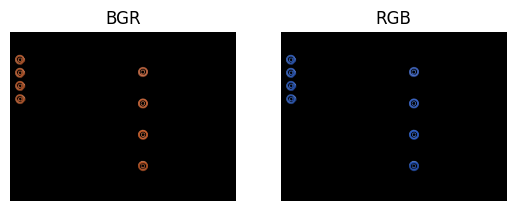

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpy로 즉석 이미지 생성
img = cv2.imread('C:/BSW/KakaoTalk_20250714_150803239.jpg')

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 파란색 범위를 정의(HSV)
lower_blue = np.array([100,100,100])
upper_blue = np.array([140,255,255])

# 마스크
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)
blue_region = cv2.bitwise_and(img,img, mask = mask) # 원본에다가 원본 마스킹
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(blue_region)
plt.title("BGR")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blue_region_rgb)
plt.title("RGB")
plt.axis('off')
plt.show()

(3000, 4000, 3)


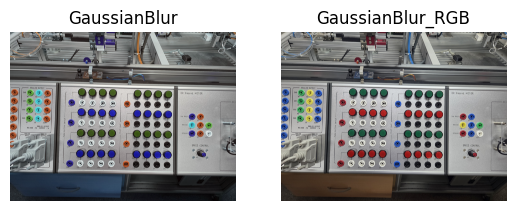

In [21]:
# 가우시안 블러 적용(노이즈 제거)
blurred = cv2.GaussianBlur(img,(7,7),0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

print(blurred.shape)
plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.show()

(3000, 4000, 3)


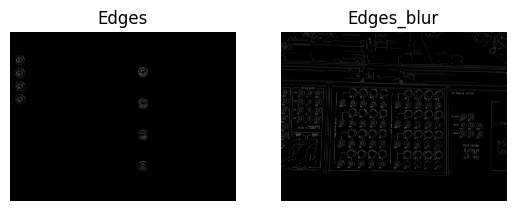

In [33]:
edges = cv2.Canny(blue_region_rgb, 50, 150) # 50 보다 작으면 값을 무시, 150 보다 클 경우 강하게 엣지로 인정
edges_blur = cv2.Canny(blurred_rgb, 50, 150) # 50 보다 작으면 값을 무시, 150 보다 클 경우 강하게 엣지로 인정

print(blurred.shape)
plt.subplot(1,2,1)
plt.imshow(edges , cmap='gray')
plt.title("Edges")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(edges_blur, cmap='gray')
plt.title("Edges_blur")
plt.axis('off')

plt.show()

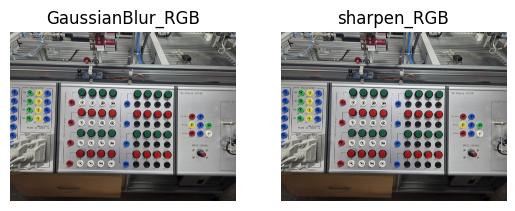

In [34]:
# blurred
# 3x3 선명화 커널
sharp_kernel = np.array([
    [ 0, -1, 0],
    [-1,  5,-1],
    [ 0, -1, 0]
])

sharpen = cv2.filter2D(blurred, -1, sharp_kernel)  # -1은 자동(auto)이라 생각하면 됨
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("sharpen_RGB")
plt.axis('off')

plt.show()

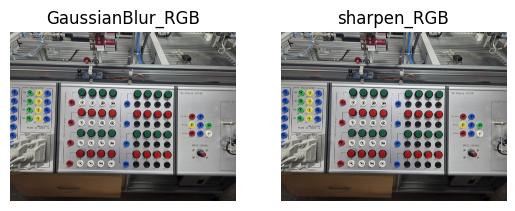

In [27]:
# 고급선명화 기법

# blue_region
# blurred

sharpen2 = cv2.addWeighted(blue_region, 2, blurred, -1,0)
sharpen2_rgb = cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("sharpen_RGB")
plt.axis('off')

plt.show()